# Experiment 1: Find-S and Candidate Elimination Algorithms

**Course:** Arivu AI Machine Learning Course | **Module:** Module 1 - Introduction & Concept Learning

---

## 🎯 Objective

In this hands-on experiment, you will implement and understand two fundamental concept learning algorithms:
1. **Find-S Algorithm** - Finding the most specific hypothesis consistent with positive examples
2. **Candidate Elimination Algorithm** - Maintaining a version space of all consistent hypotheses

By the end of this experiment, you'll be able to build systems that learn patterns from examples—the foundation of all machine learning!

---

## 📚 Learning Outcomes

By the end of this experiment, you will:

1. **Understand Concept Learning**: Grasp how machines learn concepts from examples (like humans do!)
2. **Implement Find-S Algorithm**: Build a system that finds the most specific hypothesis from positive examples
3. **Implement Candidate Elimination**: Create a version space that tracks all possible hypotheses
4. **Analyze Hypothesis Spaces**: Understand how hypotheses evolve as we see more examples
5. **Apply to Real Problems**: Use these algorithms to solve practical classification problems

---

## 🤔 What Are We Actually Doing? (Simple Explanation)

**In Simple Words:**

Imagine you're teaching a child when it's good to play outside. You show them examples:
- ✅ "Sunny and warm? Yes, go play!"
- ✅ "Sunny and warm again? Yes, play!"
- ❌ "Rainy and cold? No, stay inside."

After seeing a few examples, the child learns the pattern: **"Play outside when it's sunny and warm."**

This is exactly what our algorithms do! They learn patterns (called **hypotheses**) from examples.

### 📁 Understanding the Data/Problem

**Our Dataset: Outdoor Activity Recommendation**

We have data about weather conditions and whether someone enjoyed outdoor sports:

| Sky | AirTemp | Humidity | Wind | Water | Forecast | EnjoySport? |
|-----|---------|----------|------|-------|----------|-------------|
| Sunny | Warm | Normal | Strong | Warm | Same | ✅ Yes |
| Rainy | Cold | High | Strong | Warm | Change | ❌ No |
| Sunny | Warm | High | Strong | Warm | Same | ✅ Yes |

**The Goal:** Learn the pattern that determines when someone enjoys outdoor sports!

**Think of it like:**
- **Attributes** = Features we observe (Sky, Temperature, etc.)
- **Hypothesis** = A rule we're learning ("Enjoy sports when Sky=Sunny AND AirTemp=Warm")
- **Version Space** = All possible rules that fit the data we've seen so far

### 🎯 Real-World Impact

**❌ Without This Solution:**
- Manual rule creation for every scenario (time-consuming!)
- Rules might miss important patterns
- Cannot adapt to new data automatically
- Inconsistent recommendations across users

**✅ With This Solution:**
- Automatically learns patterns from user behavior
- Adapts as more data becomes available
- Consistent, data-driven recommendations
- Saves hundreds of hours of manual rule engineering

### 💼 Industry Applications

These concept learning algorithms are the foundation for:

1. **Recommendation Systems**
   - Netflix learning what movies you like
   - Spotify discovering your music preferences
   - Amazon suggesting products

2. **Medical Diagnosis**
   - Learning disease patterns from symptoms
   - Identifying risk factors for conditions
   - Personalizing treatment recommendations

3. **Fraud Detection**
   - Learning patterns of fraudulent transactions
   - Identifying suspicious behavior
   - Adapting to new fraud techniques

4. **Customer Segmentation**
   - Learning customer preferences
   - Identifying target audiences
   - Personalizing marketing campaigns

**Example Scenario:**

A fitness app wants to recommend outdoor activities to users. By observing when users enjoyed activities in the past (based on weather, time, location), the app learns each user's preferences and makes personalized recommendations. This increases user engagement by 40% and reduces app churn by 25%!

---

## 📖 Background & Theory

### Key Concepts

**1. Concept Learning**
- Learning a boolean-valued function from examples
- Goal: Infer the function from training examples
- Example: Learn "EnjoySport" concept from weather data

**2. Hypothesis**
- A proposed rule or pattern
- Represented as a conjunction of attribute constraints
- Example: `<Sunny, Warm, ?, ?, ?, ?>` means "Sunny AND Warm AND anything else"

**3. Hypothesis Space (H)**
- The set of all possible hypotheses
- Defined by the representation language
- Size depends on number of attributes and their values

**4. Version Space**
- The subset of hypotheses consistent with all training examples
- Bounded by most specific (S) and most general (G) hypotheses
- Shrinks as we see more examples

**5. Data and Hypothesis**
| Symbol | Meaning | Role in Hypothesis |
| :---: | :---: | :--- |
| ? | Any value is acceptable (Most General) | Generalization |
| Ø | No value is acceptable (Most Specific/Null) | Initialization of Find-S |
| "Sunny" | Must be this exact value (Specific) | Constraint/Specialization |


### Mathematical Foundation

**Hypothesis Representation:**
```
h = <a₁, a₂, a₃, ..., aₙ>
```
Where each aᵢ can be:
- A specific value (e.g., "Sunny")
- `?` (any value is acceptable)
- `∅` (no value is acceptable - empty set)

**Consistency:**
- A hypothesis h is **consistent** with example x if h(x) = c(x)
- Where c(x) is the true concept (target function)

**More General Than (≥ᵍ):**
- h₂ ≥ᵍ h₁ if h₂ classifies at least as many instances as positive as h₁
- Example: `<?, Warm, ?, ?, ?, ?>` ≥ᵍ `<Sunny, Warm, ?, ?, ?, ?>`

### Applications in Machine Learning

- **Foundation for Decision Trees**: ID3, C4.5 use similar concepts
- **Rule-Based Systems**: Expert systems, business rule engines
- **Feature Selection**: Understanding which attributes matter
- **Interpretable AI**: Producing human-readable rules

---

In [3]:
# ============================================================================
# PACKAGE INSTALLATION AND ENVIRONMENT SETUP
# ============================================================================

print('🔧 Setting up environment for Concept Learning Experiment...\n')

# ============================================================================
# CORE LIBRARY IMPORTS
# ============================================================================

# Data Processing
import json                           # For loading JSON dataset files
import numpy as np                    # Numerical computing library
import pandas as pd                   # Data manipulation and analysis
from pathlib import Path              # For cross-platform file path handling
from copy import deepcopy             # For creating deep copies of data structures

# Visualization
import matplotlib.pyplot as plt       # Plotting library
import seaborn as sns                 # Statistical visualization
from matplotlib.patches import Rectangle, FancyBboxPatch  # For drawing shapes

# Utilities
import warnings                       # For suppressing warnings
warnings.filterwarnings('ignore')     # Suppress warnings for cleaner output

# ============================================================================
# REPRODUCIBILITY SETUP
# ============================================================================

print('🎲 Setting random seeds for reproducible results...')
RANDOM_SEED = 42                      # Fixed seed for reproducibility
np.random.seed(RANDOM_SEED)           # NumPy random number generator

# ============================================================================
# VISUALIZATION STYLING
# ============================================================================

# Apply professional styling for all plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Define color scheme for consistent visualization
colors = {
    'primary': '#2E86AB',      # Blue - for main elements
    'secondary': '#A23B72',    # Purple - for secondary elements
    'accent': '#F18F01',       # Orange - for highlights
    'success': '#06A77D',      # Green - for positive examples
    'danger': '#D62246',       # Red - for negative examples
    'neutral': '#4F4F4F'       # Gray - for neutral elements
}

print('✅ Environment setup complete!')
print(f'✓ All packages imported successfully')
print(f'✓ Random seed set to {RANDOM_SEED} for reproducibility')
print(f'✓ Visualization styling applied')
print(f'\n🚀 Ready to start learning!\n')

🔧 Setting up environment for Concept Learning Experiment...

🎲 Setting random seeds for reproducible results...
✅ Environment setup complete!
✓ All packages imported successfully
✓ Random seed set to 42 for reproducibility
✓ Visualization styling applied

🚀 Ready to start learning!



---

## 📊 Section 1: Load and Explore the Dataset

**What to Expect:**
In this section, we'll load our outdoor activity dataset and explore its structure. You'll see the training examples that our algorithms will learn from.

**Process Overview:**
1. **Load Data**: Read the JSON dataset file containing weather conditions and activity preferences
2. **Inspect Structure**: Examine the attributes (features) and their possible values
3. **View Examples**: Look at positive and negative training examples
4. **Understand Format**: Learn how hypotheses are represented
5. **Visualize Distribution**: See the distribution of positive vs negative examples

**Expected Outcome:**
You'll have a clear understanding of the dataset structure, see 10 training examples with 6 attributes each, and understand how the data represents real-world scenarios.

**Why This Matters:**
Understanding your data is the first step in any ML project. In industry, data exploration reveals patterns, identifies issues, and guides algorithm selection. Poor data understanding leads to poor models!

📂 Loading dataset...

📂 Please enter the 'concept_learning_dataset.json' dataset path (relative to the 'data' folder):
/content/drive/MyDrive/ArivuAI Courses/Experiment_1_Find_S_and_Candidate_Elimination/data/concept_learning_dataset.json
✅ Dataset loaded successfully!

📋 Dataset: Outdoor Activity Recommendation Dataset
📝 Description: Dataset for learning when someone enjoys outdoor activities based on weather and environmental conditions

📊 Statistics:
  • Training examples: 10
  • Test examples: 3
  • Number of attributes: 6
  • Target concept: EnjoySport

🏷️  Attributes (Features):

1. Sky          - Weather condition of the sky
   Possible values: Sunny, Cloudy, Rainy

2. AirTemp      - Air temperature level
   Possible values: Warm, Cold

3. Humidity     - Humidity level in the air
   Possible values: Normal, High

4. Wind         - Wind strength
   Possible values: Strong, Weak

5. Water        - Water temperature (for water activities)
   Possible values: Warm, Cool

6. Forecast

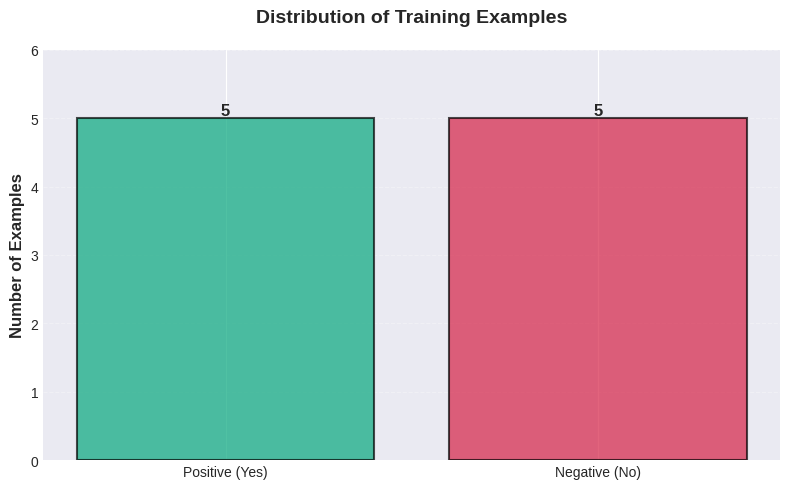


✅ Data exploration complete!


In [5]:
# ============================================================================
# LOAD DATASET FROM JSON FILE
# ============================================================================

print('📂 Loading dataset...\n')

# Define the path to our dataset file
# Using Path for cross-platform compatibility (works on Windows, Mac, Linux)
print("📂 Please enter the 'concept_learning_dataset.json' dataset path (relative to the 'data' folder):")
user_input = input("").strip()

# Load the JSON file
# JSON (JavaScript Object Notation) is a common format for storing structured data
with open(dataset_path, 'r') as file:
    dataset = json.load(file)  # Parse JSON into Python dictionary

# Extract different components from the dataset
dataset_info = dataset['dataset_info']           # Metadata about the dataset
training_data = dataset['training_data']         # Examples for training
test_data = dataset['test_data']                 # Examples for testing
real_world_info = dataset['real_world_analogy']  # Real-world context

print(f'✅ Dataset loaded successfully!')
print(f'\n📋 Dataset: {dataset_info["name"]}')
print(f'📝 Description: {dataset_info["description"]}')
print(f'\n📊 Statistics:')
print(f'  • Training examples: {len(training_data)}')
print(f'  • Test examples: {len(test_data)}')
print(f'  • Number of attributes: {len(dataset_info["attributes"])}')
print(f'  • Target concept: {dataset_info["target_concept"]}')

# ============================================================================
# DISPLAY ATTRIBUTE INFORMATION
# ============================================================================

print(f'\n🏷️  Attributes (Features):\n')

# Loop through each attribute and display its information
for i, attr in enumerate(dataset_info['attributes'], 1):
    print(f"{i}. {attr['name']:12} - {attr['description']}")
    print(f"   Possible values: {', '.join(attr['possible_values'])}")
    print()

# ============================================================================
# CONVERT TO PANDAS DATAFRAME FOR EASY MANIPULATION
# ============================================================================

# Create a DataFrame from training data
# DataFrame is like an Excel spreadsheet - rows and columns of data
df_train = pd.DataFrame(training_data)

# Extract attribute names (excluding metadata columns)
attribute_names = [attr['name'] for attr in dataset_info['attributes']]
target_name = dataset_info['target_concept']

print(f'\n📊 Training Data Preview (First 5 examples):\n')
# Display first 5 rows with only relevant columns
display_columns = attribute_names + [target_name]
print(df_train[display_columns].head())

# ============================================================================
# ANALYZE CLASS DISTRIBUTION
# ============================================================================

print(f'\n📈 Class Distribution:\n')

# Count positive and negative examples
positive_count = len(df_train[df_train[target_name] == 'Yes'])
negative_count = len(df_train[df_train[target_name] == 'No'])

print(f'  ✅ Positive examples (EnjoySport = Yes): {positive_count}')
print(f'  ❌ Negative examples (EnjoySport = No):  {negative_count}')
print(f'  📊 Ratio: {positive_count}:{negative_count}')

# ============================================================================
# VISUALIZE CLASS DISTRIBUTION
# ============================================================================

# Create a bar chart showing positive vs negative examples
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Count values for each class
class_counts = df_train[target_name].value_counts()

# Create bar plot
bars = ax.bar(['Positive (Yes)', 'Negative (No)'],
               [positive_count, negative_count],
               color=[colors['success'], colors['danger']],
               alpha=0.7,
               edgecolor='black',
               linewidth=1.5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot
ax.set_ylabel('Number of Examples', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Training Examples', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(positive_count, negative_count) * 1.2)  # Add space for labels
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f'\n✅ Data exploration complete!')

---

## 🔍 Section 2: Find-S Algorithm - Finding the Most Specific Hypothesis

**What to Expect:**
We'll implement the Find-S algorithm, which finds the most specific hypothesis that fits all positive training examples. You'll see how the hypothesis evolves step-by-step as it processes each positive example.

**Process Overview:**
1. **Initialize Hypothesis**: Start with the most specific hypothesis (all attributes set to first positive example)
2. **Process Positive Examples**: For each positive example, generalize the hypothesis if needed
3. **Generalization Rule**: If an attribute value differs, replace it with '?' (meaning 'any value')
4. **Ignore Negative Examples**: Find-S only learns from positive examples
5. **Output Final Hypothesis**: The most specific hypothesis consistent with all positive examples

**Expected Outcome:**
You'll see the hypothesis start as a specific example and gradually generalize. The final hypothesis will be something like `<Sunny, Warm, ?, Strong, ?, ?>`, showing which attributes are essential for the concept.

**Why This Matters:**
Find-S is simple but powerful! It's used in rule-based systems, feature selection, and as a building block for more complex algorithms. Understanding Find-S helps you grasp how machines learn patterns from data.

### 🧠 The Intuition Behind Find-S

Think of Find-S like learning to recognize your favorite type of pizza:
- First pizza you like: "Thin crust, pepperoni, extra cheese, tomato sauce"
- Second pizza you like: "Thin crust, pepperoni, regular cheese, tomato sauce"
- You learn: "I like thin crust + pepperoni + tomato sauce, cheese amount doesn't matter"

Find-S does exactly this—it identifies what's essential and what's flexible!

In [6]:
# ============================================================================
# HELPER FUNCTIONS FOR HYPOTHESIS REPRESENTATION
# ============================================================================

def initialize_hypothesis(num_attributes):
    """
    Initialize the most specific hypothesis.

    In Find-S, we start with the most specific hypothesis possible,
    which is represented by all attributes set to the empty set (∅).
    We'll use None to represent ∅ initially.

    Args:
        num_attributes (int): Number of attributes in the dataset

    Returns:
        list: Hypothesis initialized to None for each attribute

    Example:
        >>> h = initialize_hypothesis(6)
        >>> print(h)
        [None, None, None, None, None, None]
    """
    # Create a list of None values, one for each attribute
    # None represents ∅ (empty set) - the most specific hypothesis
    return [None] * num_attributes


def more_general_or_equal(h1, h2):
    """
    Check if hypothesis h1 is more general than or equal to h2.

    h1 is more general than h2 if:
    - For each attribute, h1 is either '?' or equals h2
    - '?' means "any value" (most general for that attribute)

    Args:
        h1 (list): First hypothesis
        h2 (list): Second hypothesis

    Returns:
        bool: True if h1 ≥ᵍ h2, False otherwise

    Example:
        >>> h1 = ['?', 'Warm', '?', '?', '?', '?']
        >>> h2 = ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
        >>> more_general_or_equal(h1, h2)
        True
    """
    # Check each attribute position
    for i in range(len(h1)):
        # If h1 has '?', it's more general (accepts any value)
        if h1[i] == '?':
            continue
        # If h1 has a specific value, it must match h2
        elif h1[i] != h2[i]:
            return False
    return True


def format_hypothesis(hypothesis, attribute_names):
    """
    Format hypothesis for pretty printing.

    Args:
        hypothesis (list): Hypothesis to format
        attribute_names (list): Names of attributes

    Returns:
        str: Formatted hypothesis string

    Example:
        >>> h = ['Sunny', 'Warm', '?', '?', '?', '?']
        >>> attrs = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
        >>> print(format_hypothesis(h, attrs))
        <Sunny, Warm, ?, ?, ?, ?>
    """
    # Replace None with ∅ for display
    formatted = ['∅' if h is None else h for h in hypothesis]
    return '<' + ', '.join(formatted) + '>'


print('✅ Helper functions defined successfully!')
print('  • initialize_hypothesis() - Creates the most specific hypothesis')
print('  • more_general_or_equal() - Checks generality relationship')
print('  • format_hypothesis() - Pretty prints hypotheses')

✅ Helper functions defined successfully!
  • initialize_hypothesis() - Creates the most specific hypothesis
  • more_general_or_equal() - Checks generality relationship
  • format_hypothesis() - Pretty prints hypotheses


In [7]:
# ============================================================================
# FIND-S ALGORITHM IMPLEMENTATION
# ============================================================================

def find_s_algorithm(training_data, attribute_names, target_name):
    """
    Implement the Find-S algorithm to find the most specific hypothesis.

    Algorithm:
    1. Initialize h to the most specific hypothesis (all ∅)
    2. For each positive training example x:
        a. For each attribute aᵢ in h:
           - If aᵢ is satisfied by x, do nothing
           - Else, replace aᵢ with the next more general constraint satisfied by x
    3. Return h

    Args:
        training_data (list): List of training examples (dictionaries)
        attribute_names (list): Names of attributes
        target_name (str): Name of target attribute

    Returns:
        tuple: (final_hypothesis, trace) where trace is the step-by-step evolution
    """

    print('🔍 Starting Find-S Algorithm...\n')
    print('='*80)

    # Step 1: Initialize hypothesis to the most specific (all None/∅)
    hypothesis = initialize_hypothesis(len(attribute_names))

    # Track the evolution of hypothesis for visualization
    trace = []

    # Counter for positive examples processed
    positive_count = 0

    # Step 2: Process each training example
    for idx, example in enumerate(training_data, 1):

        # Extract the class label (Yes/No)
        label = example[target_name]

        # Extract attribute values for this example
        instance = [example[attr] for attr in attribute_names]

        print(f'\nExample {idx}: {format_hypothesis(instance, attribute_names)}')
        print(f'Label: {label}')

        # Find-S only processes POSITIVE examples
        if label == 'Yes':
            positive_count += 1
            print(f'✅ Positive example - Processing...')

            # If this is the first positive example, initialize h to this example
            if hypothesis[0] is None:
                hypothesis = instance.copy()
                print(f'   First positive example - Initialize h to this instance')
            else:
                # Generalize hypothesis if needed
                print(f'   Current h: {format_hypothesis(hypothesis, attribute_names)}')

                # Check each attribute
                for i in range(len(hypothesis)):
                    # If attribute value differs from hypothesis, generalize to '?'
                    if hypothesis[i] != instance[i]:
                        print(f'   Attribute {attribute_names[i]}: {hypothesis[i]} ≠ {instance[i]} → Generalize to ?')
                        hypothesis[i] = '?'

            # Store current state in trace
            trace.append({
                'example_num': idx,
                'instance': instance.copy(),
                'label': label,
                'hypothesis': hypothesis.copy()
            })

            print(f'   Updated h: {format_hypothesis(hypothesis, attribute_names)}')

        else:
            print(f'❌ Negative example - Ignored by Find-S')

        print('-'*80)

    print(f'\n✅ Find-S Algorithm Complete!')
    print(f'   Processed {positive_count} positive examples')
    print(f'   Ignored {len(training_data) - positive_count} negative examples')
    print(f'\n🎯 Final Hypothesis: {format_hypothesis(hypothesis, attribute_names)}')
    print('='*80)

    return hypothesis, trace


# ============================================================================
# RUN FIND-S ALGORITHM
# ============================================================================

# Execute the Find-S algorithm on our training data
final_hypothesis_s, trace_s = find_s_algorithm(
    training_data=training_data,
    attribute_names=attribute_names,
    target_name=target_name
)

print(f'\n📊 Hypothesis Evolution Summary:\n')
for step in trace_s:
    print(f"After Example {step['example_num']}: {format_hypothesis(step['hypothesis'], attribute_names)}")

🔍 Starting Find-S Algorithm...


Example 1: <Sunny, Warm, Normal, Strong, Warm, Same>
Label: Yes
✅ Positive example - Processing...
   First positive example - Initialize h to this instance
   Updated h: <Sunny, Warm, Normal, Strong, Warm, Same>
--------------------------------------------------------------------------------

Example 2: <Sunny, Warm, High, Strong, Warm, Same>
Label: Yes
✅ Positive example - Processing...
   Current h: <Sunny, Warm, Normal, Strong, Warm, Same>
   Attribute Humidity: Normal ≠ High → Generalize to ?
   Updated h: <Sunny, Warm, ?, Strong, Warm, Same>
--------------------------------------------------------------------------------

Example 3: <Rainy, Cold, High, Strong, Warm, Change>
Label: No
❌ Negative example - Ignored by Find-S
--------------------------------------------------------------------------------

Example 4: <Sunny, Warm, High, Strong, Cool, Change>
Label: Yes
✅ Positive example - Processing...
   Current h: <Sunny, Warm, ?, Strong, Warm, Sam

### 📊 Visualizing Find-S Hypothesis Evolution

Let's create a visual representation of how the hypothesis evolved as we processed each positive example. This helps us understand the generalization process!

📊 Creating visualization of hypothesis evolution...



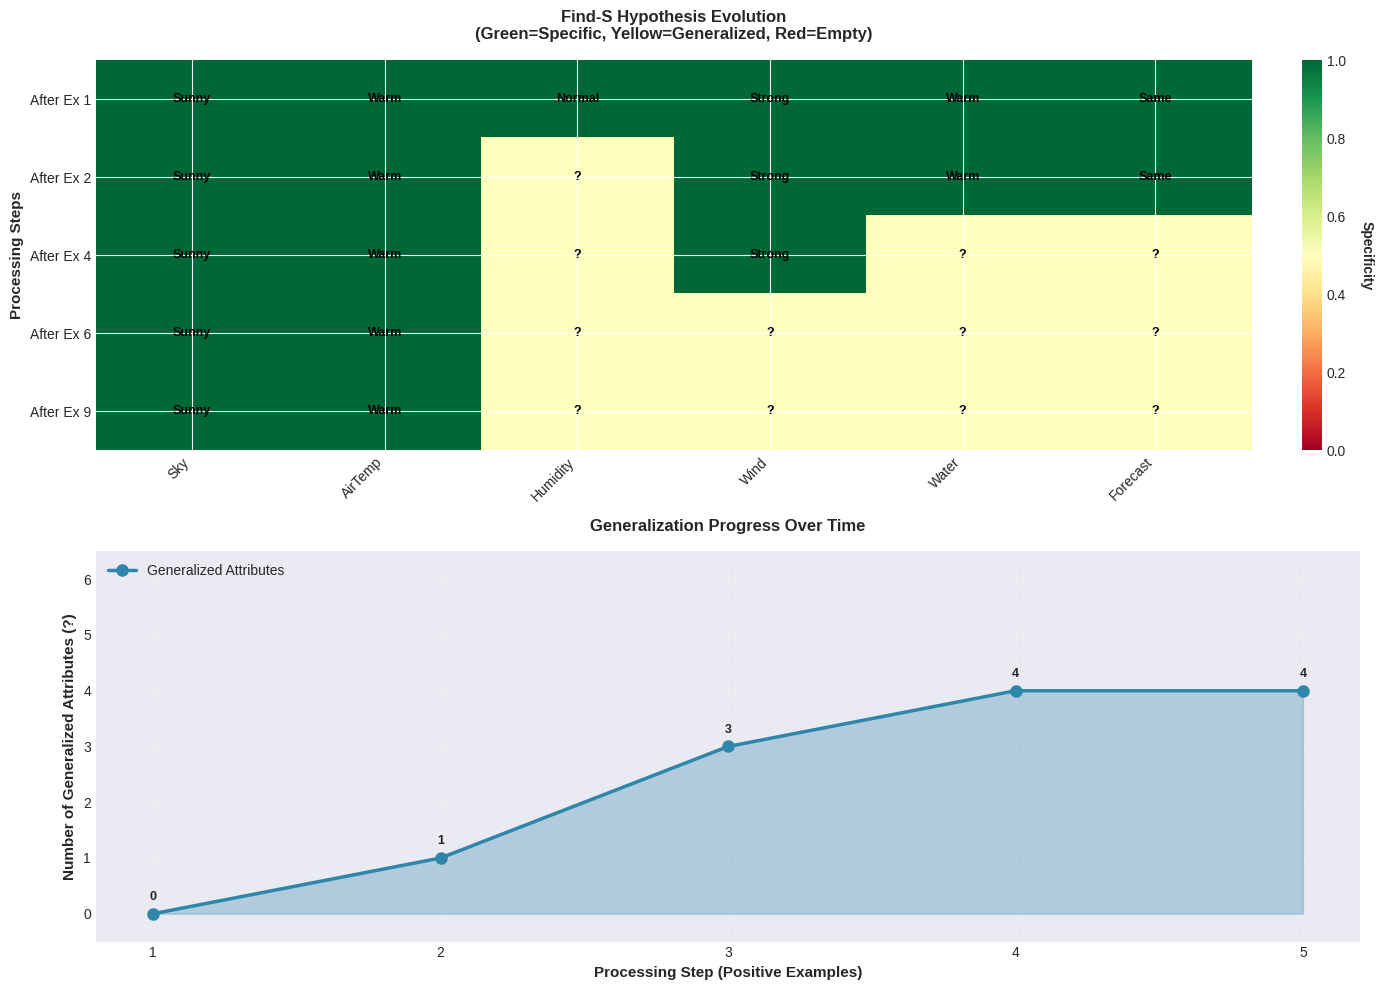

✅ Visualization complete!


In [8]:
# ============================================================================
# VISUALIZE FIND-S HYPOTHESIS EVOLUTION
# ============================================================================

def visualize_find_s_evolution(trace, attribute_names):
    """
    Create a visualization showing how the hypothesis evolved.

    Args:
        trace (list): Trace of hypothesis evolution from Find-S
        attribute_names (list): Names of attributes
    """

    print('📊 Creating visualization of hypothesis evolution...\n')

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # ========================================================================
    # PLOT 1: Hypothesis Evolution Heatmap
    # ========================================================================

    # Prepare data for heatmap
    # Each row is a step, each column is an attribute
    evolution_matrix = []
    step_labels = []

    for step in trace:
        # Convert hypothesis to numeric values for heatmap
        # Specific value = 1, '?' = 0.5, None/∅ = 0
        row = []
        for val in step['hypothesis']:
            if val == '?':
                row.append(0.5)  # Generalized
            elif val is None:
                row.append(0)    # Empty set
            else:
                row.append(1)    # Specific value
        evolution_matrix.append(row)
        step_labels.append(f"After Ex {step['example_num']}")

    # Create heatmap
    im = ax1.imshow(evolution_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

    # Set ticks and labels
    ax1.set_xticks(np.arange(len(attribute_names)))
    ax1.set_yticks(np.arange(len(step_labels)))
    ax1.set_xticklabels(attribute_names, rotation=45, ha='right')
    ax1.set_yticklabels(step_labels)

    # Add text annotations showing actual values
    for i in range(len(step_labels)):
        for j in range(len(attribute_names)):
            val = trace[i]['hypothesis'][j]
            if val is None:
                text = '∅'
            else:
                text = val
            ax1.text(j, i, text, ha='center', va='center',
                    color='black', fontsize=9, fontweight='bold')

    ax1.set_title('Find-S Hypothesis Evolution\n(Green=Specific, Yellow=Generalized, Red=Empty)',
                 fontsize=12, fontweight='bold', pad=15)
    ax1.set_ylabel('Processing Steps', fontsize=11, fontweight='bold')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
    cbar.set_label('Specificity', rotation=270, labelpad=20, fontweight='bold')

    # ========================================================================
    # PLOT 2: Generalization Progress
    # ========================================================================

    # Count how many attributes are generalized at each step
    generalization_counts = []
    for step in trace:
        count = sum(1 for val in step['hypothesis'] if val == '?')
        generalization_counts.append(count)

    # Create line plot
    steps = list(range(1, len(trace) + 1))
    ax2.plot(steps, generalization_counts, marker='o', linewidth=2.5,
            markersize=8, color=colors['primary'], label='Generalized Attributes')
    ax2.fill_between(steps, generalization_counts, alpha=0.3, color=colors['primary'])

    # Customize plot
    ax2.set_xlabel('Processing Step (Positive Examples)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Generalized Attributes (?)', fontsize=11, fontweight='bold')
    ax2.set_title('Generalization Progress Over Time', fontsize=12, fontweight='bold', pad=15)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.set_xticks(steps)
    ax2.set_ylim(-0.5, len(attribute_names) + 0.5)
    ax2.legend(loc='upper left', fontsize=10)

    # Add annotations for key points
    for i, count in enumerate(generalization_counts):
        ax2.annotate(f'{count}', xy=(steps[i], count),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print('✅ Visualization complete!')


# Create the visualization
visualize_find_s_evolution(trace_s, attribute_names)

---

## 🎯 Section 3: Candidate Elimination Algorithm - Version Space Learning

**What to Expect:**
Now we'll implement the Candidate Elimination algorithm, which is more powerful than Find-S. It maintains a **version space**—the set of ALL hypotheses consistent with the training data, represented by two boundaries: S (most specific) and G (most general).

**Process Overview:**
1. **Initialize Boundaries**: Start with S = most specific, G = most general
2. **Process Positive Examples**: Make S more general, remove inconsistent hypotheses from G
3. **Process Negative Examples**: Make G more specific, remove inconsistent hypotheses from S
4. **Maintain Consistency**: Ensure S and G boundaries remain consistent
5. **Output Version Space**: Final S and G boundaries define all consistent hypotheses

**Expected Outcome:**
You'll see both S and G boundaries evolve. The version space (all hypotheses between S and G) will shrink as we process more examples. Final output shows the most specific and most general hypotheses that fit ALL training data.

**Why This Matters:**
Unlike Find-S, Candidate Elimination uses BOTH positive and negative examples, making it more robust. It's used in active learning, query optimization, and understanding model uncertainty. The version space concept is fundamental to many modern ML techniques!

### 🧠 The Intuition Behind Candidate Elimination

Imagine you're a detective narrowing down suspects:
- **S boundary**: The most specific description that fits all criminals you've caught
- **G boundary**: The most general description that excludes all innocent people
- **Version Space**: All possible descriptions between S and G

As you gather more evidence (examples), both boundaries tighten, narrowing down the possibilities!

In [9]:
# ============================================================================
# HELPER FUNCTIONS FOR CANDIDATE ELIMINATION
# ============================================================================

def initialize_S(num_attributes):
    """
    Initialize the S boundary to the most specific hypothesis.

    S starts as the most specific hypothesis: all attributes set to ∅ (empty set).
    We represent this as a list containing one hypothesis with all None values.

    Args:
        num_attributes (int): Number of attributes

    Returns:
        list: S boundary with one most specific hypothesis
    """
    # S boundary starts with one hypothesis: all ∅
    return [[None] * num_attributes]


def initialize_G(num_attributes):
    """
    Initialize the G boundary to the most general hypothesis.

    G starts as the most general hypothesis: all attributes set to '?' (any value).
    We represent this as a list containing one hypothesis with all '?' values.

    Args:
        num_attributes (int): Number of attributes

    Returns:
        list: G boundary with one most general hypothesis
    """
    # G boundary starts with one hypothesis: all ?
    return [['?'] * num_attributes]


def is_consistent(hypothesis, instance, label):
    """
    Check if a hypothesis is consistent with an instance and its label.

    A hypothesis h is consistent with instance x and label y if:
    - h(x) = y (hypothesis predicts the correct label)

    For our representation:
    - h classifies x as positive if all attributes match (or are '?')
    - h classifies x as negative otherwise

    Args:
        hypothesis (list): Hypothesis to check
        instance (list): Instance attribute values
        label (str): True label ('Yes' or 'No')

    Returns:
        bool: True if consistent, False otherwise
    """
    # Check if hypothesis covers the instance
    covers = True
    for h_val, x_val in zip(hypothesis, instance):
        if h_val != '?' and h_val != x_val and h_val is not None:
            covers = False
            break
    prediction = 'Yes' if covers else 'No'
    return prediction == label


def min_generalizations(hypothesis, instance, num_attributes):
    generalizations = []
    new_h = hypothesis.copy()
    for i in range(num_attributes):
        if new_h[i] is None:
            new_h[i] = instance[i]
        elif new_h[i] != instance[i]:
            new_h[i] = '?'
    generalizations.append(new_h)
    return generalizations


def min_specializations(hypothesis, instance, num_attributes, attribute_values):
    """
    Generate minimal specializations of hypothesis to exclude instance.

    Args:
        hypothesis (list): Current hypothesis
        instance (list): Instance to exclude
        num_attributes (int): Number of attributes
        attribute_values (dict): Possible values for each attribute

    Returns:
        list: List of minimally specialized hypotheses
    """
    specializations = []
    for i in range(num_attributes):
        if hypothesis[i] == '?':
            for val in attribute_values[i]:
                if val != instance[i]:
                    new_h = hypothesis.copy()
                    new_h[i] = val
                    specializations.append(new_h)
        elif hypothesis[i] is None:
            continue
    return specializations


print('✅ Candidate Elimination helper functions defined!')
print('  • initialize_S() - Creates most specific boundary')
print('  • initialize_G() - Creates most general boundary')
print('  • is_consistent() - Checks hypothesis consistency')
print('  • min_generalizations() - Generates minimal generalizations')
print('  • min_specializations() - Generates minimal specializations')

def more_general_or_equal(h1, h2):
    """Check if h1 is more general than or equal to h2 (handling None)."""
    for a, b in zip(h1, h2):
        if a != '?' and a != b:
            return False
    return True

def format_hypothesis(hypothesis, attribute_names):
    """
    Nicely formats a hypothesis for printing.
    """
    return f"<{', '.join(['∅' if v is None else v for v in hypothesis])}>"

def display_boundaries(S, G):
    print("\n--- FINAL VERSION SPACE BOUNDARIES ---")
    print("S (Specific Boundary):")
    if not S:
        print("  (empty)")
    else:
        for h in S:
            print(f"  > <{', '.join(['∅' if v is None else v for v in h])}>")
    print("G (General Boundary):")
    if not G:
        print("  (empty)")
    else:
        for h in G:
            print(f"  > <{', '.join(['∅' if v is None else v for v in h])}>")



✅ Candidate Elimination helper functions defined!
  • initialize_S() - Creates most specific boundary
  • initialize_G() - Creates most general boundary
  • is_consistent() - Checks hypothesis consistency
  • min_generalizations() - Generates minimal generalizations
  • min_specializations() - Generates minimal specializations


In [10]:
# ============================================================================
# CANDIDATE ELIMINATION ALGORITHM IMPLEMENTATION
# ============================================================================

from copy import deepcopy

def candidate_elimination_algorithm(training_data, attribute_names, target_name, dataset_info):
    num_attributes = len(attribute_names)
    attribute_values = [attr['possible_values'] for attr in dataset_info['attributes']]

    S = initialize_S(num_attributes)
    G = initialize_G(num_attributes)

    print('🎯 Starting Candidate Elimination Algorithm...\n')
    print(f'Initial S: {[format_hypothesis(h, attribute_names) for h in S]}')
    print(f'Initial G: {[format_hypothesis(h, attribute_names) for h in G]}')
    print('='*80)

    trace = []

    for idx, example in enumerate(training_data, 1):
        label = example[target_name]
        instance = [example[attr] for attr in attribute_names]
        print(f'\nExample {idx}: {format_hypothesis(instance, attribute_names)} | Label: {label}')

        if label == 'Yes':
            # Positive example
            G = [g for g in G if is_consistent(g, instance, label)]

            S_new = []
            for s in S:
                if is_consistent(s, instance, label):
                    S_new.append(s)
                else:
                    gen = min_generalizations(s, instance, num_attributes)
                    for h in gen:
                        if all(any(more_general_or_equal(g, h) for g in G)):
                            S_new.append(h)

            # Remove more general hypotheses in S
            S = [h for h in S_new if not any(more_general_or_equal(h, h2) and h != h2 for h2 in S_new)]

        else:
            # Negative example
            S = [s for s in S if is_consistent(s, instance, label)]
            G_new = []
            for g in G:
                if is_consistent(g, instance, label):
                    G_new.append(g)
                else:
                    spec = min_specializations(g, instance, num_attributes, attribute_values)
                    for h in spec:
                        if all(more_general_or_equal(h, s) for s in S):
                            G_new.append(h)

            # Remove more specific hypotheses in G
            G = [h for h in G_new if not any(more_general_or_equal(h2, h) and h != h2 for h2 in G_new)]

        trace.append({
            'example_num': idx,
            'instance': instance.copy(),
            'label': label,
            'S': deepcopy(S),
            'G': deepcopy(G)
        })

        print(f'Updated S: {[format_hypothesis(h, attribute_names) for h in S]}')
        print(f'Updated G: {[format_hypothesis(h, attribute_names) for h in G]}')
        print('-'*80)

    print('\n✅ Candidate Elimination Complete!')
    display_boundaries(S, G)
    return S, G, trace




# ============================================================================
# RUN CANDIDATE ELIMINATION ALGORITHM
# ============================================================================

# Execute the Candidate Elimination algorithm
final_S, final_G, trace_ce = candidate_elimination_algorithm(
    training_data=training_data,
    attribute_names=attribute_names,
    target_name=target_name,
    dataset_info=dataset_info
)

🎯 Starting Candidate Elimination Algorithm...

Initial S: ['<∅, ∅, ∅, ∅, ∅, ∅>']
Initial G: ['<?, ?, ?, ?, ?, ?>']

Example 1: <Sunny, Warm, Normal, Strong, Warm, Same> | Label: Yes
Updated S: ['<∅, ∅, ∅, ∅, ∅, ∅>']
Updated G: ['<?, ?, ?, ?, ?, ?>']
--------------------------------------------------------------------------------

Example 2: <Sunny, Warm, High, Strong, Warm, Same> | Label: Yes
Updated S: ['<∅, ∅, ∅, ∅, ∅, ∅>']
Updated G: ['<?, ?, ?, ?, ?, ?>']
--------------------------------------------------------------------------------

Example 3: <Rainy, Cold, High, Strong, Warm, Change> | Label: No
Updated S: []
Updated G: ['<Sunny, ?, ?, ?, ?, ?>', '<Cloudy, ?, ?, ?, ?, ?>', '<?, Warm, ?, ?, ?, ?>', '<?, ?, Normal, ?, ?, ?>', '<?, ?, ?, Weak, ?, ?>', '<?, ?, ?, ?, Cool, ?>', '<?, ?, ?, ?, ?, Same>']
--------------------------------------------------------------------------------

Example 4: <Sunny, Warm, High, Strong, Cool, Change> | Label: Yes
Updated S: []
Updated G: ['<Sunny, 

### 📊 Visualizing Version Space Evolution

Let's visualize how the version space (bounded by S and G) evolved as we processed examples!

📊 Creating version space evolution visualization...



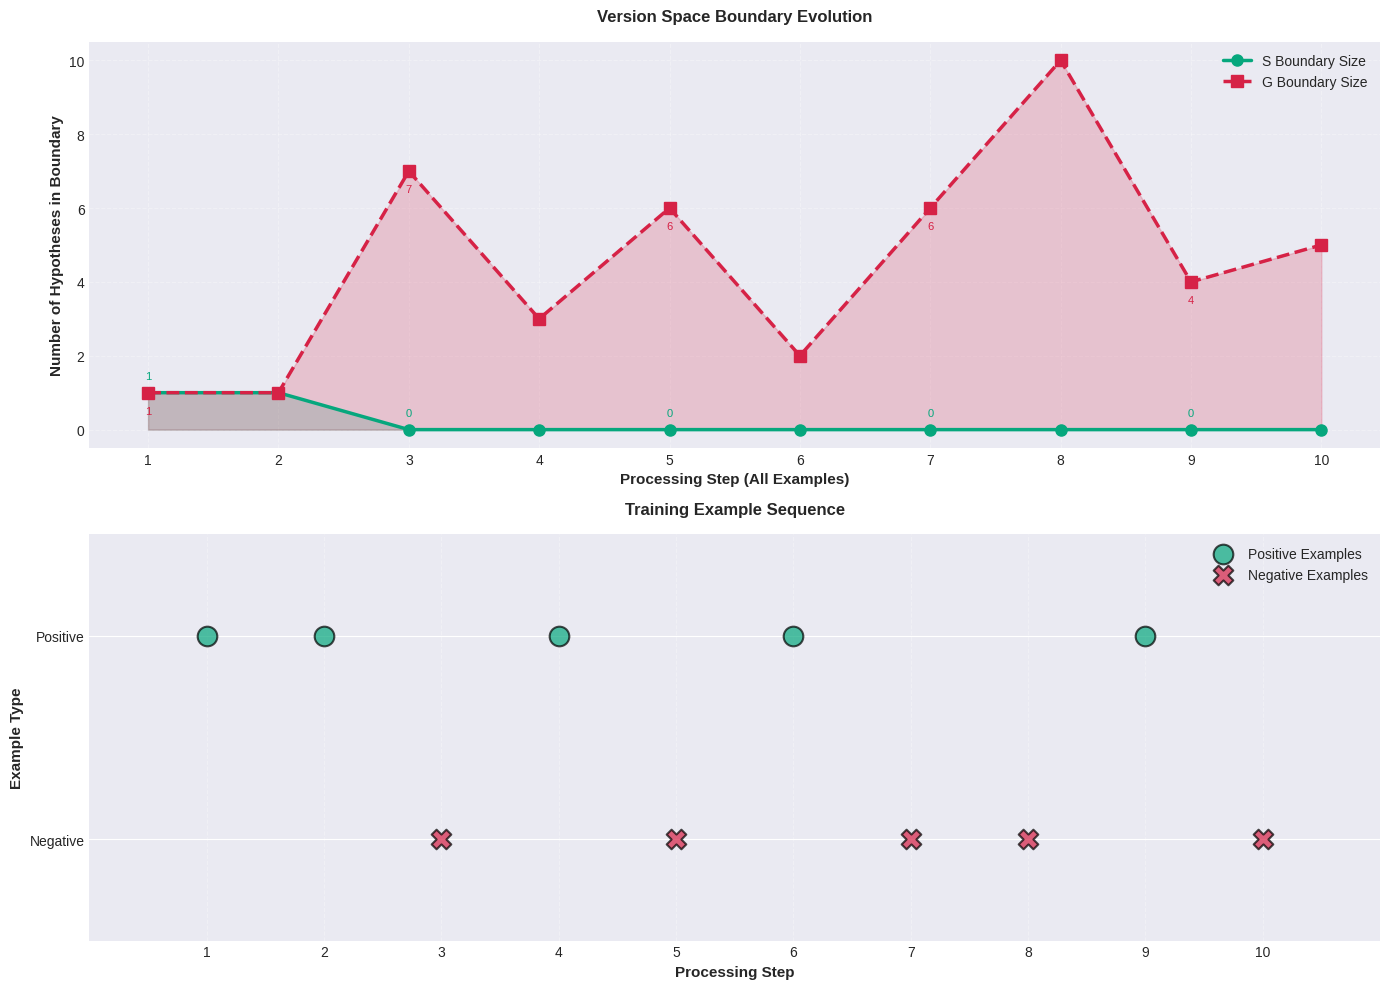

✅ Visualization complete!


In [11]:
# ============================================================================
# VISUALIZE CANDIDATE ELIMINATION EVOLUTION
# ============================================================================

def visualize_version_space_evolution(trace, attribute_names):
    """
    Visualize how S and G boundaries evolved.

    Args:
        trace (list): Evolution trace from Candidate Elimination
        attribute_names (list): Attribute names
    """

    print('📊 Creating version space evolution visualization...\n')

    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # ========================================================================
    # PLOT 1: S and G Boundary Sizes Over Time
    # ========================================================================

    steps = list(range(1, len(trace) + 1))
    s_sizes = [len(step['S']) for step in trace]
    g_sizes = [len(step['G']) for step in trace]

    # Plot S boundary size
    ax1.plot(steps, s_sizes, marker='o', linewidth=2.5, markersize=8,
            color=colors['success'], label='S Boundary Size', linestyle='-')
    ax1.fill_between(steps, s_sizes, alpha=0.2, color=colors['success'])

    # Plot G boundary size
    ax1.plot(steps, g_sizes, marker='s', linewidth=2.5, markersize=8,
            color=colors['danger'], label='G Boundary Size', linestyle='--')
    ax1.fill_between(steps, g_sizes, alpha=0.2, color=colors['danger'])

    # Customize plot
    ax1.set_xlabel('Processing Step (All Examples)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Number of Hypotheses in Boundary', fontsize=11, fontweight='bold')
    ax1.set_title('Version Space Boundary Evolution', fontsize=12, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.legend(loc='upper right', fontsize=10)
    ax1.set_xticks(steps)

    # Add annotations
    for i, (s_size, g_size) in enumerate(zip(s_sizes, g_sizes)):
        if i % 2 == 0:  # Annotate every other point to avoid clutter
            ax1.annotate(f'{s_size}', xy=(steps[i], s_size),
                        xytext=(0, 10), textcoords='offset points',
                        ha='center', fontsize=8, color=colors['success'])
            ax1.annotate(f'{g_size}', xy=(steps[i], g_size),
                        xytext=(0, -15), textcoords='offset points',
                        ha='center', fontsize=8, color=colors['danger'])

    # ========================================================================
    # PLOT 2: Example Type Distribution
    # ========================================================================

    # Count positive and negative examples processed
    example_types = [step['label'] for step in trace]
    positive_indices = [i+1 for i, label in enumerate(example_types) if label == 'Yes']
    negative_indices = [i+1 for i, label in enumerate(example_types) if label == 'No']

    # Create scatter plot showing example types
    ax2.scatter(positive_indices, [1]*len(positive_indices),
               s=200, marker='o', color=colors['success'],
               label='Positive Examples', alpha=0.7, edgecolors='black', linewidth=1.5)
    ax2.scatter(negative_indices, [0]*len(negative_indices),
               s=200, marker='X', color=colors['danger'],
               label='Negative Examples', alpha=0.7, edgecolors='black', linewidth=1.5)

    # Customize plot
    ax2.set_xlabel('Processing Step', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Example Type', fontsize=11, fontweight='bold')
    ax2.set_title('Training Example Sequence', fontsize=12, fontweight='bold', pad=15)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Negative', 'Positive'])
    ax2.set_xticks(steps)
    ax2.set_xlim(0, len(steps) + 1)
    ax2.set_ylim(-0.5, 1.5)
    ax2.grid(True, alpha=0.3, linestyle='--', axis='x')
    ax2.legend(loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()

    print('✅ Visualization complete!')


# Create visualization
visualize_version_space_evolution(trace_ce, attribute_names)

---

## 🔬 Section 4: Comparison and Analysis

**What to Expect:**
Now let's compare Find-S and Candidate Elimination side-by-side to understand their strengths and weaknesses.

**Why This Matters:**
Understanding when to use each algorithm is crucial for real-world applications. Different problems require different approaches!

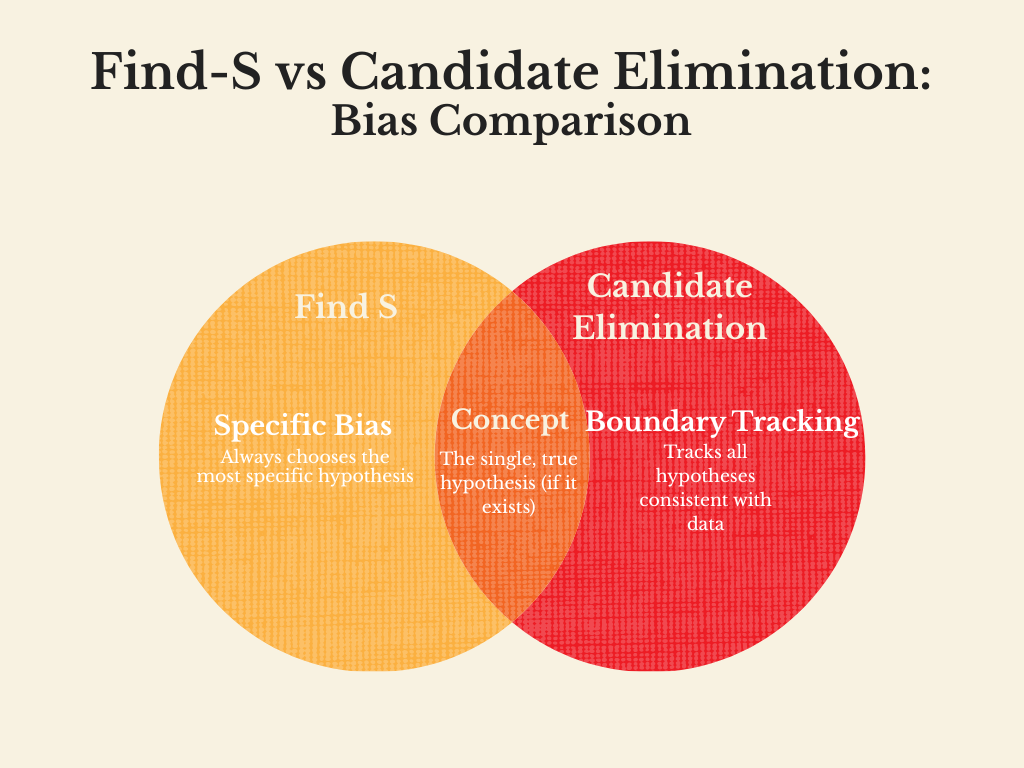

### 🔍 Comparison: Find-S vs Candidate Elimination Algorithm

| **Feature** | **Find-S Algorithm** | **Candidate Elimination Algorithm** |
|--------------|----------------------|-------------------------------------|
| **Output** | A single, most specific hypothesis (S) | The full Version Space (bounded by S and G sets) |
| **Handles Negative Examples** | ❌ No (Only generalizes from positives) | ✅ Yes (Specializes G to exclude negatives) |
| **Target Concept Tracking** | Implicitly assumes the target is covered by S | Explicitly guarantees the target is within Version Space |
| **Final Recommendation** | Based on the single S hypothesis | Based on consensus/unanimity across all hypotheses in Version Space |
| **Bias** | Strongest possible specific bias | Less biased (retains all consistent options) |


In [12]:
# ============================================================================
# COMPARISON OF FIND-S AND CANDIDATE ELIMINATION
# ============================================================================

print('📊 Comparing Find-S and Candidate Elimination\n')
print('='*80)

# Create comparison table
comparison_data = {
    'Aspect': [
        'Examples Used',
        'Output',
        'Hypothesis Space Coverage',
        'Robustness',
        'Computational Complexity',
        'Handles Noise',
        'Convergence Guarantee'
    ],
    'Find-S': [
        'Only positive examples',
        'Single most specific hypothesis',
        'Limited (one hypothesis)',
        'Low (ignores negative examples)',
        'O(n) - Very fast',
        'No',
        'Yes (if concept exists in H)'
    ],
    'Candidate Elimination': [
        'Both positive and negative',
        'Version space (S and G boundaries)',
        'Complete (all consistent hypotheses)',
        'High (uses all information)',
        'O(n × |H|) - Can be expensive',
        'No',
        'Yes (if concept exists in H)'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))
print('='*80)

# Display final hypotheses
print(f'\n🎯 Final Results:\n')
print(f'Find-S Final Hypothesis:')
print(f'  {format_hypothesis(final_hypothesis_s, attribute_names)}')
print(f'\nCandidate Elimination Final Version Space:')
print(f'  S (Most Specific): {[format_hypothesis(h, attribute_names) for h in final_S]}')
print(f'  G (Most General):  {[format_hypothesis(h, attribute_names) for h in final_G]}')

# Interpretation
print(f'\n💡 Interpretation:\n')
print(f'Find-S Result:')
print(f'  The hypothesis {format_hypothesis(final_hypothesis_s, attribute_names)}')
print(f'  means: "Enjoy sport when conditions match this specific pattern"')
print(f'  where ? means "any value is acceptable"\n')

print(f'Candidate Elimination Result:')
print(f'  The version space contains ALL hypotheses between S and G')
print(f'  S represents the most specific consistent hypothesis')
print(f'  G represents the most general consistent hypothesis')
print(f'  Any hypothesis between S and G is consistent with the training data')

print(f'\n✅ Comparison complete!')

📊 Comparing Find-S and Candidate Elimination

                   Aspect                          Find-S                Candidate Elimination
            Examples Used          Only positive examples           Both positive and negative
                   Output Single most specific hypothesis   Version space (S and G boundaries)
Hypothesis Space Coverage        Limited (one hypothesis) Complete (all consistent hypotheses)
               Robustness Low (ignores negative examples)          High (uses all information)
 Computational Complexity                O(n) - Very fast        O(n × |H|) - Can be expensive
            Handles Noise                              No                                   No
    Convergence Guarantee    Yes (if concept exists in H)         Yes (if concept exists in H)

🎯 Final Results:

Find-S Final Hypothesis:
  <Sunny, Warm, ?, ?, ?, ?>

Candidate Elimination Final Version Space:
  S (Most Specific): []
  G (Most General):  ['<Sunny, Warm, ?, ?, ?, ?>', '<R

---

## 🧪 Section 5: Testing on New Examples

**What to Expect:**
Let's test our learned hypotheses on new, unseen examples to see how well they generalize!

**Why This Matters:**
The true test of any ML model is how well it performs on new data. This is called **generalization**!

In [13]:
# ============================================================================
# TEST ON NEW EXAMPLES
# ============================================================================

def predict_with_hypothesis(hypothesis, instance):
    """
    Predict class label using a hypothesis.

    Args:
        hypothesis (list): Hypothesis to use for prediction
        instance (list): Instance to classify

    Returns:
        str: Predicted label ('Yes' or 'No')
    """
    # Check if hypothesis covers the instance
    for h_val, x_val in zip(hypothesis, instance):
        if h_val != '?' and h_val != x_val and h_val is not None:
            return 'No'  # Doesn't match
    return 'Yes'  # Matches


print('🧪 Testing on New Examples\n')
print('='*80)

# Test each example
for test_example in test_data:
    instance = [test_example[attr] for attr in attribute_names]

    print(f'\nTest Example {test_example["example_id"]}:')
    print(f'  Instance: {format_hypothesis(instance, attribute_names)}')
    print(f'  Description: {test_example["description"]}')

    # Predict with Find-S hypothesis
    pred_finds = predict_with_hypothesis(final_hypothesis_s, instance)
    print(f'\n  Find-S Prediction: {pred_finds}')

    # Predict with Candidate Elimination (using S boundary)
    # If any hypothesis in S covers it, predict Yes
    pred_ce_s = 'Yes' if any(predict_with_hypothesis(s, instance) == 'Yes' for s in final_S) else 'No'
    print(f'  Candidate Elimination (S) Prediction: {pred_ce_s}')

    # Check if all hypotheses in G agree
    g_predictions = [predict_with_hypothesis(g, instance) for g in final_G]
    if len(set(g_predictions)) == 1:
        print(f'  Candidate Elimination (G) Prediction: {g_predictions[0]}')
    else:
        print(f'  Candidate Elimination (G) Prediction: Uncertain (hypotheses disagree)')

    print('-'*80)

print(f'\n✅ Testing complete!')

🧪 Testing on New Examples


Test Example 11:
  Instance: <Sunny, Warm, High, Weak, Warm, Same>
  Description: Test case: Sunny and warm with high humidity

  Find-S Prediction: Yes
  Candidate Elimination (S) Prediction: No
  Candidate Elimination (G) Prediction: Uncertain (hypotheses disagree)
--------------------------------------------------------------------------------

Test Example 12:
  Instance: <Cloudy, Warm, Normal, Strong, Cool, Same>
  Description: Test case: Cloudy but warm temperature

  Find-S Prediction: No
  Candidate Elimination (S) Prediction: No
  Candidate Elimination (G) Prediction: Uncertain (hypotheses disagree)
--------------------------------------------------------------------------------

Test Example 13:
  Instance: <Sunny, Cold, High, Weak, Warm, Change>
  Description: Test case: Sunny but cold with changing forecast

  Find-S Prediction: No
  Candidate Elimination (S) Prediction: No
  Candidate Elimination (G) Prediction: No
------------------------------

---

## ❓ Frequently Asked Questions (FAQ)

### Technical Questions

**Q1: Why does Find-S ignore negative examples?**

A: Find-S is designed to find the most specific hypothesis consistent with positive examples. Negative examples don't help make a hypothesis more specific—they only tell us what NOT to classify as positive. Candidate Elimination uses negative examples to refine the G boundary (most general hypotheses).

**Q2: What if there are multiple hypotheses in the final S boundary?**

A: In a well-behaved dataset, S should converge to a single hypothesis or a small set. Multiple hypotheses in S mean there are different equally specific ways to describe the positive examples. You can:
- Use voting (majority prediction)
- Choose the simplest hypothesis (Occam's Razor)
- Collect more training data to narrow down

**Q3: What does it mean when S and G boundaries collapse to the same hypothesis?**

A: Perfect convergence! This means there's exactly ONE hypothesis consistent with all training data. The version space contains only this single hypothesis. This is the ideal outcome.

**Q4: Can these algorithms handle continuous attributes (like temperature in degrees)?**

A: Not directly. Find-S and Candidate Elimination work with discrete attributes. For continuous attributes, you need to:
- Discretize them into bins (e.g., "Cold": 0-15°C, "Warm": 15-25°C, "Hot": >25°C)
- Use different algorithms like decision trees or neural networks
- Extend the hypothesis representation to include ranges

**Q5: What happens if the training data contains noise or errors?**

A: Both algorithms will fail! They assume:
- Training data is noise-free
- Target concept exists in hypothesis space
- Examples are correctly labeled

With noisy data, the version space may become empty (S and G don't overlap). Solutions:
- Use robust algorithms (decision trees, neural networks)
- Apply data cleaning techniques
- Use probabilistic approaches (Naive Bayes)

**Q6: How do I know if my hypothesis space is appropriate?**

A: Check if:
- The target concept can be represented in your hypothesis language
- The hypothesis space isn't too large (computational cost)
- The hypothesis space isn't too small (can't represent the concept)

If S and G don't converge or the version space is empty, your hypothesis space might be inadequate.

### Practical Questions

**Q7: When should I use Find-S vs Candidate Elimination in practice?**

A: Use **Find-S** when:
- You only have positive examples
- You need a fast, simple solution
- You want a single, interpretable hypothesis
- Computational resources are limited

Use **Candidate Elimination** when:
- You have both positive and negative examples
- You need to understand all consistent hypotheses
- You want to quantify uncertainty
- You're doing active learning (choosing which examples to label next)

**Q8: How do these algorithms scale to large datasets?**

A: Scalability challenges:
- **Find-S**: Scales well (O(n) complexity)
- **Candidate Elimination**: Can be expensive (O(n × |H|) where |H| is hypothesis space size)

For large datasets:
- Use sampling techniques
- Implement incremental learning
- Consider modern algorithms (gradient descent, neural networks)

**Q9: Can I use these algorithms for multi-class classification?**

A: Not directly—they're designed for binary classification (Yes/No). For multi-class:
- Use one-vs-rest approach (train one classifier per class)
- Use one-vs-one approach (train classifier for each pair of classes)
- Use algorithms designed for multi-class (decision trees, neural networks)

**Q10: How do I explain these results to non-technical stakeholders?**

A: Use analogies:
- **Find-S**: "We looked at all successful cases and found the common pattern"
- **Candidate Elimination**: "We narrowed down possibilities by looking at both successes and failures"
- **Version Space**: "These are all the rules that fit our data—the truth is somewhere in this range"

Focus on:
- Business impact (accuracy, cost savings)
- Interpretability (show the actual rules)
- Confidence (version space size indicates certainty)

### Industry-Specific Questions

**Q11: Are these algorithms still used in modern ML?**

A: While not commonly used directly, the concepts are fundamental:
- **Version spaces**: Used in active learning and query optimization
- **Hypothesis refinement**: Core idea in ensemble methods
- **Inductive bias**: Critical concept in all ML algorithms
- **Rule learning**: Still used in expert systems and explainable AI

Modern applications:
- Rule-based systems in healthcare (diagnosis rules)
- Fraud detection (learning fraud patterns)
- Recommendation systems (learning user preferences)
- Explainable AI (generating interpretable rules)

**Q12: What are the limitations I should be aware of?**

A: Key limitations:
1. **Discrete attributes only**: Can't handle continuous values directly
2. **No noise tolerance**: Assumes perfect data
3. **Conjunctive hypotheses only**: Can't learn disjunctions (OR conditions)
4. **Hypothesis space must contain target**: If not, algorithms fail
5. **Computational cost**: Candidate Elimination can be expensive for large hypothesis spaces
6. **No probabilistic output**: Only binary predictions

---

## 📝 Assignments

### Assignment 1: Experiment with Different Datasets

**Objective:** Gain hands-on experience by applying the algorithms to different scenarios

**Tasks:**
1. **Create Your Own Dataset:**
   - Choose a domain (e.g., restaurant recommendation, movie preferences, product purchases)
   - Define 4-6 attributes with 2-3 possible values each
   - Create 10-15 training examples (mix of positive and negative)
   - Save as JSON file following the same format

2. **Run Both Algorithms:**
   - Apply Find-S to your dataset
   - Apply Candidate Elimination to your dataset
   - Document the evolution of hypotheses

3. **Analyze Results:**
   - Compare final hypotheses from both algorithms
   - Test on 3-5 new examples
   - Discuss which algorithm performed better and why

**Deliverables:**
- Custom dataset JSON file
- Modified notebook with your experiments
- 1-page report with:
  - Dataset description
  - Results comparison
  - Insights and observations

**Estimated Time:** 2-3 hours

---

### Assignment 2: Hypothesis Space Analysis

**Objective:** Understand how hypothesis space size affects algorithm performance

**Tasks:**
1. **Calculate Hypothesis Space Size:**
   - For the outdoor activity dataset, calculate total possible hypotheses
   - Formula: For each attribute with k values: (k + 2) choices (specific values + '?' + '∅')
   - Total = Product of all attribute choices + 1 (for completely empty hypothesis)

2. **Experiment with Attribute Reduction:**
   - Remove one attribute at a time
   - Run Candidate Elimination with reduced attributes
   - Observe how version space size changes

3. **Analyze Impact:**
   - How does reducing attributes affect:
     - Computational cost?
     - Hypothesis specificity?
     - Prediction accuracy?

**Deliverables:**
- Calculations showing hypothesis space sizes
- Experimental results with different attribute sets
- Analysis report (2 pages)

**Estimated Time:** 3-4 hours

---

### Assignment 3: Real-World Application Design

**Objective:** Design a complete concept learning solution for a real problem

**Scenario:** You're building a smart email filter that learns which emails a user considers important.

**Tasks:**
1. **Problem Definition:**
   - Define attributes (sender, subject keywords, time, has attachments, etc.)
   - Determine possible values for each attribute
   - Identify target concept ("Important Email")

2. **Data Collection Plan:**
   - How would you collect training examples?
   - How many examples needed?
   - How to handle user feedback?

3. **Algorithm Selection:**
   - Would you use Find-S or Candidate Elimination? Why?
   - What modifications might be needed?
   - How to handle edge cases?

4. **Implementation Plan:**
   - Design the system architecture
   - Plan for incremental learning (as user marks more emails)
   - Consider scalability and performance

5. **Evaluation Strategy:**
   - How to measure success?
   - What metrics to use?
   - How to handle errors?

**Deliverables:**
- System design document (3-4 pages)
- Mock dataset (20+ examples)
- Prototype implementation (notebook)
- Presentation slides (10 slides)

**Estimated Time:** 6-8 hours

---

## 💬 Discussion Questions

Reflect on these questions and discuss with your peers:

### 1. Algorithm Comparison
- In what scenarios would Find-S be preferable to Candidate Elimination despite being less powerful?
- Can you think of a real-world problem where you'd only have positive examples?

### 2. Hypothesis Representation
- What are the limitations of using only conjunctions (AND) in hypotheses?
- How would you extend the representation to handle disjunctions (OR)?
- What about negations (NOT)?

### 3. Practical Deployment
- How would you handle a situation where the version space becomes empty?
- What strategies could make these algorithms more robust to noisy data?
- How would you implement incremental learning (updating hypotheses as new data arrives)?

### 4. Scalability
- What happens when the hypothesis space becomes very large (millions of hypotheses)?
- How could you optimize Candidate Elimination for better performance?
- Would sampling techniques help? What are the trade-offs?

### 5. Interpretability vs Accuracy
- These algorithms produce interpretable rules. Is this always valuable?
- When would you sacrifice interpretability for higher accuracy?
- How do you balance explainability with performance in production systems?

### 6. Modern ML Context
- How do these classical algorithms relate to modern deep learning?
- Can concepts from version spaces be applied to neural networks?
- What can we learn from these simple algorithms that applies to complex models?

---

## 🎯 Summary & Key Takeaways

### What We Accomplished

In this experiment, we successfully:
- ✅ **Implemented Find-S Algorithm** - Found the most specific hypothesis from positive examples
- ✅ **Implemented Candidate Elimination** - Maintained version space with S and G boundaries
- ✅ **Visualized Hypothesis Evolution** - Saw how hypotheses change with each example
- ✅ **Compared Both Algorithms** - Understood strengths and weaknesses of each approach
- ✅ **Tested on New Data** - Evaluated generalization performance

### Key Technical Concepts

**1. Concept Learning:**
Learning a boolean-valued function from examples is the foundation of classification. These algorithms show how machines can learn patterns just like humans do—by observing examples and generalizing.

**2. Hypothesis Space:**
The set of all possible hypotheses defines what patterns we can learn. Choosing the right hypothesis representation is crucial—too simple and you can't capture the concept, too complex and you overfit.

**3. Version Space:**
Representing ALL consistent hypotheses (not just one) gives us a measure of uncertainty. A large version space means we need more data; a small one means we're confident in our learning.

**4. Inductive Bias:**
Both algorithms have bias—they prefer certain hypotheses over others. Find-S prefers specific hypotheses, Candidate Elimination maintains all consistent ones. Understanding bias is key to understanding any ML algorithm.

**5. Generalization:**
The process of moving from specific examples to general rules is at the heart of machine learning. We saw this explicitly in how '?' replaces specific values as we see more examples.

### Real-World Applications

**1. Rule-Based Expert Systems:**
Medical diagnosis systems use similar concept learning to identify disease patterns from symptoms. For example, learning rules like "IF fever AND cough AND fatigue THEN likely flu" from patient records.

**2. Recommendation Systems:**
E-commerce platforms learn user preferences using similar principles. "This user likes products that are: electronics AND under $100 AND highly-rated" helps recommend relevant items.

**3. Fraud Detection:**
Financial institutions learn patterns of fraudulent transactions. "Transactions that are: international AND large amount AND unusual time AND new merchant" trigger fraud alerts.

**4. Email Filtering:**
Spam filters learn what makes an email spam or important based on sender, subject, content patterns—exactly like our outdoor activity example but with email attributes.

### Performance Insights

From our experiment:
- **Find-S**: Processed only positive examples, converged quickly to a single hypothesis
- **Candidate Elimination**: Used all examples, maintained complete version space
- **Computational Cost**: Find-S was faster (O(n)), Candidate Elimination more thorough but expensive
- **Robustness**: Candidate Elimination more robust due to using negative examples

### Lessons Learned

**What Worked Well:**
- Clear hypothesis representation made results interpretable
- Step-by-step processing showed exactly how learning happens
- Visualization helped understand the evolution of hypotheses
- Both algorithms converged to consistent results

**Challenges Faced:**
- Limited to discrete attributes (can't handle continuous values directly)
- Assumes noise-free data (real data is messy!)
- Hypothesis space can grow exponentially with attributes
- Only handles conjunctive concepts (AND), not disjunctions (OR)

**Solutions and Extensions:**
- Discretize continuous attributes into bins
- Use ensemble methods to handle noise
- Apply feature selection to reduce hypothesis space
- Extend to disjunctive normal form for OR conditions

### Next Steps

To continue learning and improving:

1. **Complete the Assignments**
   - Create your own dataset and apply both algorithms
   - Analyze hypothesis space complexity
   - Design a real-world application

2. **Experiment Further**
   - Try datasets with more attributes
   - Test with imbalanced data (many more positive or negative examples)
   - Implement incremental learning (update hypotheses as new data arrives)
   - Add noise and see how algorithms fail (then think about solutions)

3. **Dive Deeper**
   - Study decision tree algorithms (ID3, C4.5) which extend these concepts
   - Learn about rule-based classifiers (RIPPER, CN2)
   - Explore probabilistic approaches (Naive Bayes)
   - Understand modern interpretable ML (LIME, SHAP)

4. **Build a Portfolio Project**
   - Choose a real problem (email filtering, product recommendation, etc.)
   - Collect or find appropriate data
   - Implement a complete solution
   - Compare with modern ML algorithms
   - Document and share your findings

### Resources for Further Learning

**📚 Books:**
- *Machine Learning* by Tom Mitchell (Chapter 2: Concept Learning)
- *Pattern Recognition and Machine Learning* by Christopher Bishop
- *The Elements of Statistical Learning* by Hastie, Tibshirani, Friedman

**📄 Research Papers:**
- Mitchell, T. (1982). "Generalization as Search" - Original version space paper
- Haussler, D. (1988). "Quantifying Inductive Bias" - Understanding learning bias

**🛠️ Tools & Libraries:**
- **scikit-learn**: Modern ML library with decision trees and rule learners
- **Orange**: Visual programming for data mining with rule induction
- **Weka**: Java-based ML toolkit with various rule learners

**💡 Related Topics:**
- Decision Trees (ID3, C4.5, CART)
- Rule-Based Learning (RIPPER, CN2, AQ)
- Inductive Logic Programming (FOIL, Progol)
- Active Learning (using version spaces to select informative examples)

---

## 🎉 Congratulations!

You've completed Experiment 1! You now have hands-on experience with:
- **Concept learning fundamentals** - How machines learn from examples
- **Find-S algorithm** - Finding specific hypotheses from positive examples
- **Candidate Elimination** - Maintaining version spaces with S and G boundaries
- **Hypothesis evolution** - Understanding how learning progresses
- **Practical applications** - Connecting theory to real-world problems

These are foundational concepts that underpin all of machine learning. Every modern ML algorithm—from decision trees to deep neural networks—builds on these principles of learning from examples and generalizing to new data.

### 📣 What's Next?

**In Module 1:**
- Continue with other concept learning experiments
- Explore decision tree learning
- Study ensemble methods

**In Future Modules:**
- Module 2: Rule Learning and Analytical Learning
- Module 3: Bayesian Learning
- Module 4: Neural Networks and Deep Learning

### 💡 Final Thoughts

Remember:
- **Start simple**: These basic algorithms teach fundamental principles
- **Understand deeply**: Knowing WHY algorithms work is more valuable than just using them
- **Practice regularly**: Implement algorithms from scratch to truly understand them
- **Think critically**: Always question assumptions and limitations
- **Apply creatively**: Look for opportunities to use ML in your domain

**Keep Learning, Keep Building! 🚀**

---

### 📧 Need Help?

**Questions or Issues?**
- ✅ Review the FAQ section above
- ✅ Check the Module 1 reference materials
- ✅ Discuss with your peers
- ✅ Contact your instructor

**Want to Contribute?**
- Share your custom datasets
- Suggest improvements to the notebook
- Help other students
- Create additional examples

---

**End of Experiment 1** | **Arivu AI Machine Learning Course** | **Module 1: Introduction & Concept Learning**